<a href="https://colab.research.google.com/github/Shaurov05/Website-Classification/blob/master/webC_MNB(stemmer(0.9145)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
names=['URL','Category']
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/thesis/URL Classification.csv',names=names, na_filter=False)
df1 = df[1:2000]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
#df6 = df[77000:1562978]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


Text(0, 0.5, 'Total Number Of Individual Category')

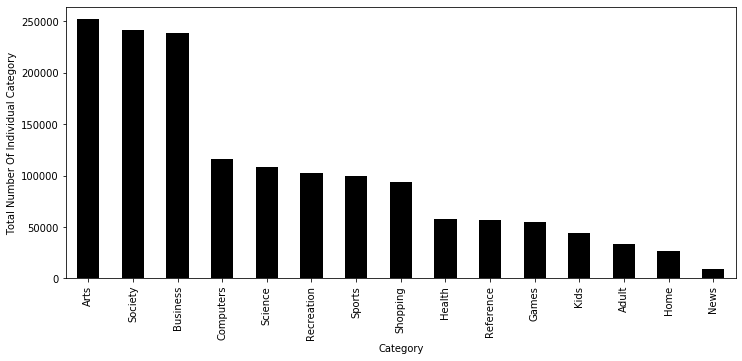

In [274]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='black');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

Text(0, 0.5, 'Total Number Of Individual Category')

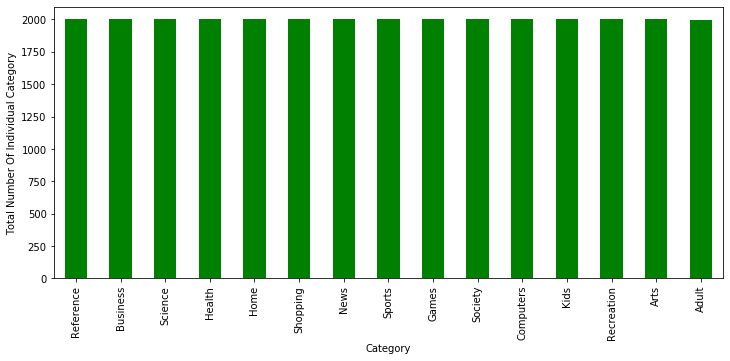

In [275]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

In [276]:
X_train=df['URL']
y_train=df['Category']
#print(X_train)
X_train.shape

(1532979,)

In [277]:
X_test=dt['URL']
y_test=dt['Category']
#print(X_test)
X_test.shape

(29999,)

In [0]:
#from sklearn.pipeline import Pipeline
#text_clf = Pipeline([('vect',
#                     CountVectorizer(stop_words = 'english', ngram_range=(1,2))), 
#                     ('tfidf', TfidfTransformer()), 
#                     ('clf', MultinomialNB(fit_prior = 'False' , alpha = 0.001 ))])
#text_clf = text_clf.fit(X_train, y_train)
#gs_clf = text_clf

In [279]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english', ngram_range=(2,2))
gs_clf = Pipeline([('vect', stemmed_count_vect),
                         ('tfidf', TfidfTransformer()),
                         ('mnb', MultinomialNB(fit_prior=False, alpha = 0.0001)),
   ])
gs_clf = gs_clf.fit(X_train, y_train)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#from sklearn.pipeline import Pipeline
#import nltk
#nltk.download('stopwords')
#gs_clf = Pipeline([('vect', CountVectorizer( ngram_range=(1,1))),
#                      ('tfidf', TfidfTransformer()),
#                       ('clf', MultinomialNB(fit_prior= False)),
#  ])
#gs_clf = gs_clf.fit(X_train , y_train)

In [0]:
#from sklearn.pipeline import Pipeline
#from sklearn.linear_model import SGDClassifier
#gs_clf = Pipeline([
#                    ('vect', CountVectorizer(stop_words='english')),
#                    ('tfidf', TfidfTransformer()),
#                    ('clf', SGDClassifier(loss='perceptron', penalty='l2',
#                     alpha =1e-4,random_state=42, max_iter=10, shuffle = True ,tol=None)),
#                    ])
#gs_clf = text_clf.fit(X_train , y_train)

In [0]:
#from sklearn.model_selection import GridSearchCV
#parameters = { 
#     'vect__ngram_range': [(1, 1), (1, 2), (2,2)],
#     'clf__alpha': (1e-2, 1e-3 , 1e-4),
#     'clf__fit_prior' : (True, False) }

#gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)
#gs_clf = gs_clf.fit(X_train , y_train)
#gs_clf.best_score_
#gs_clf.cv_results_

#for param_name in sorted(parameters.keys()):
#     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))


In [0]:
#from sklearn.model_selection import RandomizedSearchCV
#n_iter_search = 5
#parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
#gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
#gs_clf = gs_clf.fit(X_train, y_train)

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Category'],test_size=0.3, random_state = 0)

In [0]:
#y=np.array(df[names[1]])
#print(y)

#from sklearn.pipeline import Pipeline
#from sklearn.multiclass import OneVsRestClassifier
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])
#text_clf= Pipeline([
                #('tfidf', TfidfVectorizer(stop_words=stop_words)),
                #('clf', OneVsRestClassifier(MultinomialNB(
                   # fit_prior=True, class_prior=None))),
            #])
#text_clf = text_clf.fit(X_train, y_train)
#test_clf =text_clf.fit(X_test, y_test)

In [0]:
#text_clf.get_params().keys()

In [0]:
#from sklearn.model_selection import RandomizedSearchCV
#n_iter_search = 5
#parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
#gs_clf = gs_clf.fit(X_train, y_train)

In [0]:
#print(X_test)

In [288]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9344296394345298, 0.9264642154738492, 0.914512093408281, None)

In [289]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

       Adult     0.9904    0.2576    0.4089      1999
        Arts     0.7513    0.9095    0.8229      2000
    Business     0.8090    0.9870    0.8892      2000
   Computers     0.9727    0.9810    0.9768      2000
       Games     0.9682    0.9905    0.9792      2000
      Health     0.9769    0.9960    0.9864      2000
        Home     0.9565    0.9895    0.9727      2000
        Kids     0.9366    0.9080    0.9221      2000
        News     0.9866    0.9910    0.9888      2000
  Recreation     0.8487    0.9925    0.9150      2000
   Reference     0.9228    0.9795    0.9503      2000
     Science     0.9673    0.9610    0.9641      2000
    Shopping     0.9803    0.9975    0.9888      2000
     Society     0.9661    0.9960    0.9808      2000
      Sports     0.9831    0.9600    0.9714      2000

    accuracy                         0.9265     29999
   macro avg     0.9344    0.9264    0.9145     29999
weighted avg     0.9344   

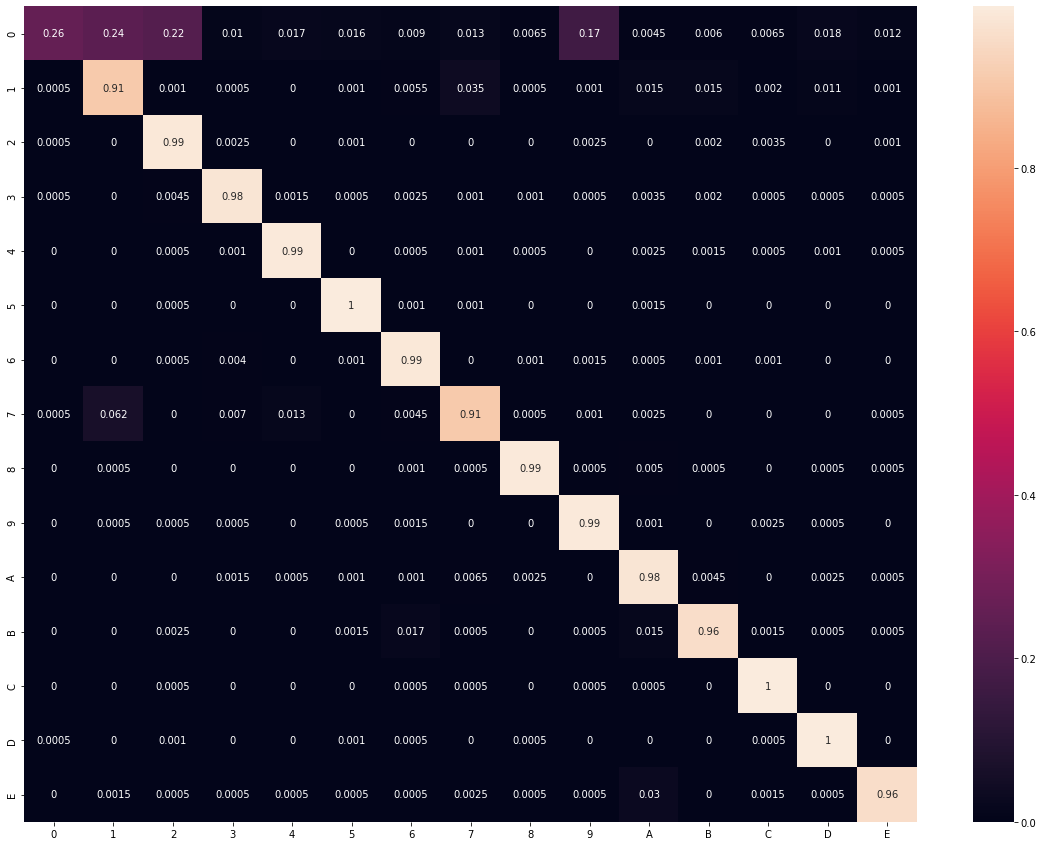

In [290]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [291]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9678984513160324
Naive Bayes Test Accuracy =  0.9264642154738492


In [292]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['News']
['Games']
